In [1]:
import sys
sys.path.append('/storage/vbutoi/projects')
sys.path.append('/storage/vbutoi/libraries')
sys.path.append('/storage/vbutoi/projects/ESE')
sys.path.append('/storage/vbutoi/projects/UniverSeg')

from ionpy.analysis import ResultsLoader
from ese.experiment.experiment import CalibrationExperiment
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

import os 
os.environ['DATAPATH'] = ':'.join((
       '/storage/vbutoi/datasets',
))

# Results loader object does everything
rs = ResultsLoader()
root = "/storage/vbutoi/scratch/ESE"

%load_ext yamlmagic
%load_ext autoreload
%autoreload 2

In [2]:
# path = f"{root}/10_23_23_Dense_WMH"

# dfc = rs.load_configs(
#     path,
#     properties=False,
# )

# df = rs.load_metrics(dfc)

In [3]:

# os.environ["CUDA_VISIBLE_DEVICES"] = '0'

# best_exp = rs.get_best_experiment(
#     df=df,
#     exp_class=CalibrationExperiment,
#     device="cuda"
# )
# best_exp.build_dataloader(batch_size=1)

In [4]:
# best_exp.vis_loss_curves(height=6)

In [5]:
# %%yaml wmh_dataset_config

# split: val 
# task: Amsterdam 
# slicing: midslice 

<IPython.core.display.Javascript object>

In [6]:
# from ese.experiment.analysis.inference import get_dataset_perf 

# # val_perf is a dict where each item is the subj id
# predictions_list, unique_labels = get_dataset_perf(
#     exp=best_exp, 
#     dataset_cfg=wmh_dataset_config
#     )

In [7]:
# len(predictions_list), len(unique_labels)

In [8]:
# from ese.experiment.analysis.inference import get_pixelinfo_df

# pixel_preds_df = get_pixelinfo_df(
#     data_points=predictions_list,
#     num_bins=10,
#     conf_interval=[0.5, 1.0]
#     )

In [ ]:
# from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence

# viz_accuracy_vs_confidence(
#     pixel_preds_df,
#     title="WMH Confidence vs Accuracy per (Bin and Predicted Label)",
#     x="pred_label",
#     hue="measure",
#     col="bin_num",
#     kind="bar",
#     add_average=True,
#     facet_kws={'sharey': False, 'sharex': False}
#     )

In [9]:
from ese.experiment.analysis.inference import load_cal_inference_stats

path = f"{root}/Inference_10_23_23_Dense_WMH"

pix_inference_dicts, _, metadata_df = load_cal_inference_stats(
    path,
    return_metadata=True
)

In [10]:
metadata_df['log_set']

0    20231101_174308-2IXE-2be808fecf81b332c0eb34bb4...
Name: log_set, dtype: object

In [15]:
# Get the pixel preds out
pixel_preds_dict = pix_inference_dicts[metadata_df['log_set'][0]]

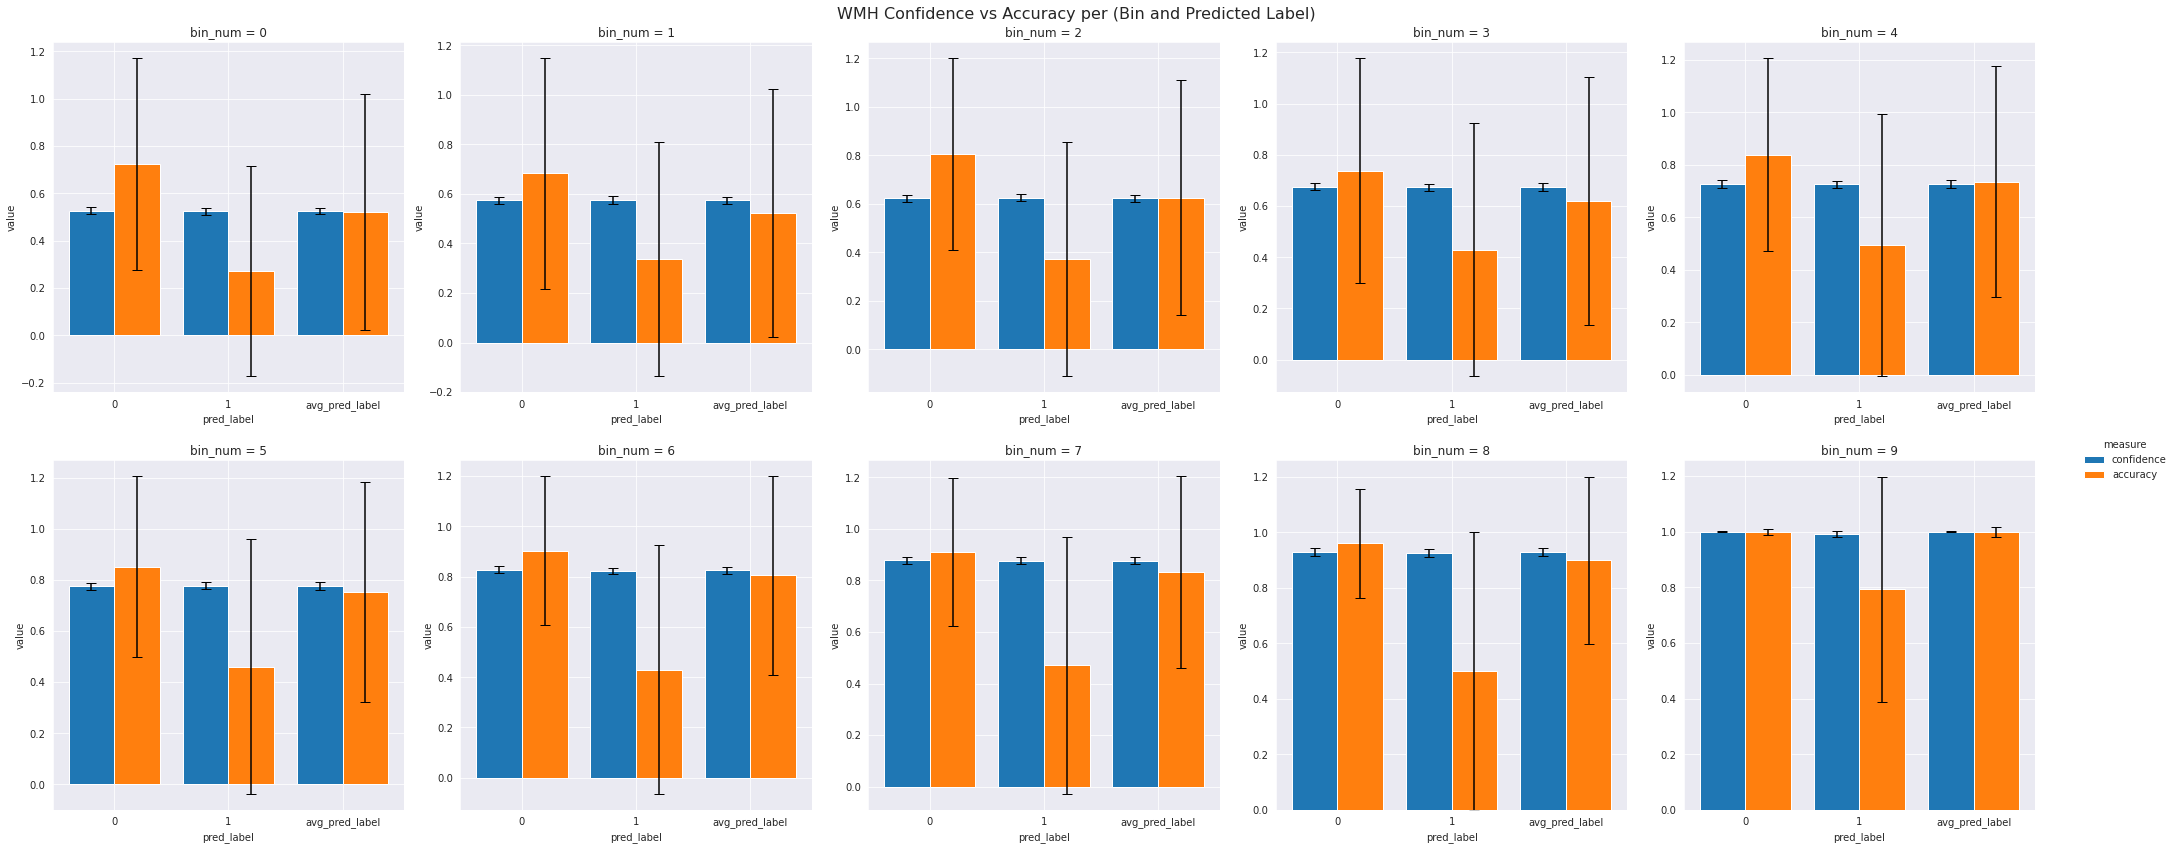

In [20]:
from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence

viz_accuracy_vs_confidence(
    pixel_preds_dict,
    title="WMH Confidence vs Accuracy per (Bin and Predicted Label)",
    x="pred_label",
    hue="measure",
    col="bin_num",
    kind="bar",
    add_average=True,
    facet_kws={'sharey': False, 'sharex': False}
    )

In [ ]:
from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence

viz_accuracy_vs_confidence(
    pixel_preds_dict,
    title="WMH Confidence vs Accuracy per (Bin and Predicted Label)",
    x="pred_label",
    hue="measure",
    col="bin_num",
    kind="line",
    add_average=True,
    facet_kws={'sharey': False, 'sharex': False}
    )

In [ ]:
from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence

viz_accuracy_vs_confidence(
    pixel_preds_dict,
    title="WMH Confidence vs Accuracy per (Bin and Num Neighbors)",
    x="num_neighbors",
    hue="measure",
    col="bin_num",
    kind="bar",
    add_average=True,
    facet_kws={'sharey': False, 'sharex': False},
    )

In [ ]:
from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence

viz_accuracy_vs_confidence(
    pixel_preds_dict,
    title="WMH Confidence vs Accuracy per (Bin and Num Neighbors)",
    x="num_neighbors",
    hue="measure",
    col="bin_num",
    kind="line",
    add_average=True,
    facet_kws={'sharey': False, 'sharex': False},
    )

In [ ]:
from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence

viz_accuracy_vs_confidence(
    pixel_preds_dict,
    title="WMH Confidence vs Accuracy per (Bin, Predicted Label, and Num Neighbors)",
    x="pred_label,num_neighbors",
    hue="measure",
    col="bin_num",
    kind="bar",
    x_labels=False,
    add_average=True,
    facet_kws={'sharey': False, 'sharex': False},
    )

In [ ]:
from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence

viz_accuracy_vs_confidence(
    pixel_preds_dict,
    title="WMH Confidence vs Accuracy per (Bin, Predicted Label, and Num Neighbors)",
    x="num_neighbors",
    hue="pred_label",
    col="bin_num",
    kind="line",
    style="measure",
    add_average=True,
    facet_kws={'sharey': False, 'sharex': False}
    )